**Modern methods of Data Analysis**

**Seminar 1**

In [1]:
import pandas as pd # import of packages or libraries by "import"
pd.set_option("display.precision", 2) # functions of package after "." # display.precision: how many symbols after comma

In [2]:
# DiProDB: database for dinucleotide properties - (http://diprodb.fli-leibniz.de/)

In [6]:
import os # when it is needed to work with a laptop
currentDirectory = os.getcwd()
currentDirectory

'/content'

In [8]:
df = pd.read_csv("table_diprodb_moda_seminar1.txt") # in pandas a table is referred as dataframe. let's write it as df
# read_csv (comma separated value)
# we are in the right dir -> it is needed to write a filename ("table_diprodb_moda_seminar1.txt")

In [9]:
df.head() # we see a bad separator - tab "\t"

,ID\tPropertyName\tAA\tAC\tAG\tAT\tCA\tCC\tCG\tCT\tGA\tGC\tGG\tGT\tTA\tTC\tTG\tTT\t
0,1\tTwist\t38.9\t31.12\t32.15\t33.81\t41.41\t34...
1,2\tStacking energy\t-12\t-11.8\t-11.5\t-10.6\t...
2,3\tRise\t3.16\t3.41\t3.63\t3.89\t3.23\t4.08\t3...
3,4\tBend\t3.07\t2.97\t2.31\t2.6\t3.58\t2.16\t2....
4,5\tTip\t1.76\t2\t0.9\t1.87\t-1.64\t0.71\t0.22\...


In [11]:
df = pd.read_csv("table_diprodb_moda_seminar1.txt", sep = "\t")
df.head()
# then, we have "NaN" -> that is bad / "NaN" - "not defined values"

,ID,PropertyName,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,Unnamed: 18
0,1,Twist,38.90,31.12,32.15,33.81,41.41,34.96,32.91,32.15,41.31,38.50,34.96,31.12,33.28,41.31,41.41,38.90,NaN
1,2,Stacking energy,-12.00,-11.80,-11.50,-10.60,-12.30,-9.50,-13.10,-11.50,-11.40,-13.20,-9.50,-11.80,-11.20,-11.40,-12.30,-12.00,NaN
2,3,Rise,3.16,3.41,3.63,3.89,3.23,4.08,3.60,3.63,3.47,3.81,4.08,3.41,3.21,3.47,3.23,3.16,NaN
3,4,Bend,3.07,2.97,2.31,2.60,3.58,2.16,2.81,2.31,2.51,3.06,2.16,2.97,6.74,2.51,3.58,3.07,NaN
4,5,Tip,1.76,2.00,0.90,1.87,-1.64,0.71,0.22,0.90,1.35,2.50,0.71,2.00,6.70,1.35,-1.64,1.76,NaN


In [13]:
# let's find the size of table
df.shape # horizontal, vertical

(125, 19)

In [14]:
df.columns # names of columns

Index(['ID', 'PropertyName', 'AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT',
       'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT', 'Unnamed: 18'],
      dtype='object')

In [16]:
# it is needed to convert rows and columns between them -> in data analysis it is better to have objects (dinucleotides) as rows, properties as columns
dft = df.transpose() # it is better to create new df to prevent a removal of old one

In [18]:
dft # the result is bad: "property name" row is like the second row after "ID" row

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
PropertyName,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
AA,39,-12,3.2,3.1,1.8,-1.4,12,9.1,4,3.4,5.3,9,3,2.9,35,54,18,1.2,1,-17,0.64,-8,-22,-0.08,0.8,36,1.9,0.1,0.023,0.1,0.04,3.3,-5.4,-0.67,-1.7,-0.89,35,-0.43,0.046,0.039,...,-0.08,3.3,36,-0.4,0.5,-0.03,35,0.5,0.3,0,-0.1,3.3,36,7.2,-1.5e+02,-1.3,3.2,-0.8,7,31,-14,7.7,0.94,0.7,-6.6,-18,-0.9,-0.93,-6.8,-19,-5.4,-0.5,36,2.3,38,14,5.3,-7.6,-21,-1
AC,31,-12,3.4,3,2,-0.11,12,9.4,4,3,6,8.8,3.3,4.2,60,98,10,1.1,1.1,-6.7,0.95,-9.4,-26,0.23,-0.2,31,0.3,-0.6,0.083,-0.1,0.14,3.4,-11,-1.3,-1.1,-1.4,32,-0.98,0.049,0.041,...,-0.58,3.4,36,-0.9,0.4,-0.13,33,0.1,0.5,0.2,-0.2,3.3,34,1.1,1.4e+02,-1.4,3.2,0.8,4.8,32,-14,8.9,1.1,1.3,-10,-26,-2.1,-2.2,-11,-30,-2.5,-2.7,34,-2,36,9.6,9.7,-8.4,-22,-1.4
AG,32,-12,3.6,2.3,0.9,-0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1.1,1.1,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.035,-0.2,0.08,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,-1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
AT,34,-11,3.9,2.6,1.9,0,13,9,4.7,3,5.3,8.9,3.3,4.2,20,57,7.2,1.1,1,-17,1.7,-5.6,-15,-0.06,0,29,0,-0.7,0.09,0,0.14,3.3,-6.6,-0.62,-1.2,-0.81,29,-0.27,0.046,0.04,...,-0.59,3.3,33,0,-0.6,-0.37,31,0,-0.8,0,-0.4,3.3,32,2.6,0,-1.4,3.2,1.1,7.1,33,-15,9.1,0.95,0.85,-5.7,-16,-0.9,-1.1,-9.4,-27,-7.3,0,35,-8.1,40,12,1.1,-7.2,-20,-0.88
CA,41,-12,3.2,3.6,-1.6,1.3,14,8.7,4,3.8,4.8,9.1,3.7,3.1,60,55,16,1.1,1.2,-8.6,0.8,-8.2,-21,0.11,6.4,36,0.3,0.4,0.12,0,0.21,3.4,-6.6,-1.2,-1.8,-1.4,37,-0.97,0.021,0.028,...,0.53,3.3,37,0.6,1.1,1.5,39,-0.7,0.5,0.1,1.6,3.4,34,3.5,-64,-1.5,3.1,1,9.9,31,-14,6.4,0.94,0.79,-10,-28,-1.8,-2.1,-10,-27,6.8,0.4,34,7.4,32,1.4,4.6,-8.5,-23,-1.4
CC,35,-9.5,4.1,2.2,0.71,-1.1,15,8.4,4,3.4,4.6,9,4,2.8,1.3e+02,86,10,0.99,1.3,-13,1.8,-11,-28,-0.01,3.3,33,1,-0.1,0.35,0,0.49,3.4,-8.3,-1.6,-2.8,-1.6,33,-1.2,0.048,0.041,...,-0.22,3.4,33,-1.1,6.5,0.6,33,2.7,6,0,0.8,3.4,34,2.1,-57,-1.8,3.3,0.3,8.7,32,-11,8,1,0.98,-12,-30,-2.9,-3.3,-13,-33,1.3,0.6,33,1.4,36,7.4,5.5,-8,-20,-1.8
CG,33,-13,3.6,2.8,0.22,0,14,8.8,4.7,3.8,5.2,9.1,4.7,3.2,85,73,1.1,1,1.2,-11,2.4,-12,-29,0.3,6.5,35,0,0.7,0.19,0,0.35,3.4,-9.7,-1.9,-3.3,-2,36,-1.7,0.023,0.028,...,0.41,3.4,31,0,6.6,0.63,37,0,3.1,0,0.7,3.4,30,6.7,0,-1.9,3.3,-0.1,12,27,-16,6.2,1,1.1,-8,-19,-2,-2.4,-11,-27

In [20]:
dft.shape # size of new transposed matrix

(19, 125)

In [23]:
# we may drop columns (drop is not the same as delete) that are not needed
dft17 = dft.drop(["ID", "Unnamed: 18"])
dft17

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
PropertyName,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
AA,39,-12,3.2,3.1,1.8,-1.4,12,9.1,4,3.4,5.3,9,3,2.9,35,54,18,1.2,1,-17,0.64,-8,-22,-0.08,0.8,36,1.9,0.1,0.023,0.1,0.04,3.3,-5.4,-0.67,-1.7,-0.89,35,-0.43,0.046,0.039,...,-0.08,3.3,36,-0.4,0.5,-0.03,35,0.5,0.3,0,-0.1,3.3,36,7.2,-1.5e+02,-1.3,3.2,-0.8,7,31,-14,7.7,0.94,0.7,-6.6,-18,-0.9,-0.93,-6.8,-19,-5.4,-0.5,36,2.3,38,14,5.3,-7.6,-21,-1
AC,31,-12,3.4,3,2,-0.11,12,9.4,4,3,6,8.8,3.3,4.2,60,98,10,1.1,1.1,-6.7,0.95,-9.4,-26,0.23,-0.2,31,0.3,-0.6,0.083,-0.1,0.14,3.4,-11,-1.3,-1.1,-1.4,32,-0.98,0.049,0.041,...,-0.58,3.4,36,-0.9,0.4,-0.13,33,0.1,0.5,0.2,-0.2,3.3,34,1.1,1.4e+02,-1.4,3.2,0.8,4.8,32,-14,8.9,1.1,1.3,-10,-26,-2.1,-2.2,-11,-30,-2.5,-2.7,34,-2,36,9.6,9.7,-8.4,-22,-1.4
AG,32,-12,3.6,2.3,0.9,-0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1.1,1.1,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.035,-0.2,0.08,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,-1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
AT,34,-11,3.9,2.6,1.9,0,13,9,4.7,3,5.3,8.9,3.3,4.2,20,57,7.2,1.1,1,-17,1.7,-5.6,-15,-0.06,0,29,0,-0.7,0.09,0,0.14,3.3,-6.6,-0.62,-1.2,-0.81,29,-0.27,0.046,0.04,...,-0.59,3.3,33,0,-0.6,-0.37,31,0,-0.8,0,-0.4,3.3,32,2.6,0,-1.4,3.2,1.1,7.1,33,-15,9.1,0.95,0.85,-5.7,-16,-0.9,-1.1,-9.4,-27,-7.3,0,35,-8.1,40,12,1.1,-7.2,-20,-0.88
CA,41,-12,3.2,3.6,-1.6,1.3,14,8.7,4,3.8,4.8,9.1,3.7,3.1,60,55,16,1.1,1.2,-8.6,0.8,-8.2,-21,0.11,6.4,36,0.3,0.4,0.12,0,0.21,3.4,-6.6,-1.2,-1.8,-1.4,37,-0.97,0.021,0.028,...,0.53,3.3,37,0.6,1.1,1.5,39,-0.7,0.5,0.1,1.6,3.4,34,3.5,-64,-1.5,3.1,1,9.9,31,-14,6.4,0.94,0.79,-10,-28,-1.8,-2.1,-10,-27,6.8,0.4,34,7.4,32,1.4,4.6,-8.5,-23,-1.4
CC,35,-9.5,4.1,2.2,0.71,-1.1,15,8.4,4,3.4,4.6,9,4,2.8,1.3e+02,86,10,0.99,1.3,-13,1.8,-11,-28,-0.01,3.3,33,1,-0.1,0.35,0,0.49,3.4,-8.3,-1.6,-2.8,-1.6,33,-1.2,0.048,0.041,...,-0.22,3.4,33,-1.1,6.5,0.6,33,2.7,6,0,0.8,3.4,34,2.1,-57,-1.8,3.3,0.3,8.7,32,-11,8,1,0.98,-12,-30,-2.9,-3.3,-13,-33,1.3,0.6,33,1.4,36,7.4,5.5,-8,-20,-1.8
CG,33,-13,3.6,2.8,0.22,0,14,8.8,4.7,3.8,5.2,9.1,4.7,3.2,85,73,1.1,1,1.2,-11,2.4,-12,-29,0.3,6.5,35,0,0.7,0.19,0,0.35,3.4,-9.7,-1.9,-3.3,-2,36,-1.7,0.023,0.028,...,0.41,3.4,31,0,6.6,0.63,37,0,3.1,0,0.7,3.4,30,6.7,0,-1.9,3.3,-0.1,12,27,-16,6.2,1,1.1,-8,-19,-2,-2.4,-11,-27,4.6,0,34,6.3,34,4,12,-11,-27,-2.2
CT,32,-12,3.6,2.3,0.9,0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1,1.2,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,-

In [25]:
# then, we would like to have the whole row w "PropertyName", "Twist" .. as the main one (like the title of the table)
header = dft17.iloc[0] # "iloc" creates new obj with index 0
header

0                  Twist
1        Stacking energy
2                   Rise
3                   Bend
4                    Tip
             ...        
120    Flexibility_slide
121    Flexibility_shift
122             Enthalpy
123              Entropy
124          Free energy
Name: PropertyName, Length: 125, dtype: object

In [26]:
dft16 = dft17[1:] # this table (dft16) starts from the second row; btw, index in python starts from 0 [1] / columns are going to be the same [] # the first index is for row, the second one - for column
dft16

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
AA,39,-12,3.2,3.1,1.8,-1.4,12,9.1,4,3.4,5.3,9,3,2.9,35,54,18,1.2,1,-17,0.64,-8,-22,-0.08,0.8,36,1.9,0.1,0.023,0.1,0.04,3.3,-5.4,-0.67,-1.7,-0.89,35,-0.43,0.046,0.039,...,-0.08,3.3,36,-0.4,0.5,-0.03,35,0.5,0.3,0,-0.1,3.3,36,7.2,-1.5e+02,-1.3,3.2,-0.8,7,31,-14,7.7,0.94,0.7,-6.6,-18,-0.9,-0.93,-6.8,-19,-5.4,-0.5,36,2.3,38,14,5.3,-7.6,-21,-1
AC,31,-12,3.4,3,2,-0.11,12,9.4,4,3,6,8.8,3.3,4.2,60,98,10,1.1,1.1,-6.7,0.95,-9.4,-26,0.23,-0.2,31,0.3,-0.6,0.083,-0.1,0.14,3.4,-11,-1.3,-1.1,-1.4,32,-0.98,0.049,0.041,...,-0.58,3.4,36,-0.9,0.4,-0.13,33,0.1,0.5,0.2,-0.2,3.3,34,1.1,1.4e+02,-1.4,3.2,0.8,4.8,32,-14,8.9,1.1,1.3,-10,-26,-2.1,-2.2,-11,-30,-2.5,-2.7,34,-2,36,9.6,9.7,-8.4,-22,-1.4
AG,32,-12,3.6,2.3,0.9,-0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1.1,1.1,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.035,-0.2,0.08,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,-1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
AT,34,-11,3.9,2.6,1.9,0,13,9,4.7,3,5.3,8.9,3.3,4.2,20,57,7.2,1.1,1,-17,1.7,-5.6,-15,-0.06,0,29,0,-0.7,0.09,0,0.14,3.3,-6.6,-0.62,-1.2,-0.81,29,-0.27,0.046,0.04,...,-0.59,3.3,33,0,-0.6,-0.37,31,0,-0.8,0,-0.4,3.3,32,2.6,0,-1.4,3.2,1.1,7.1,33,-15,9.1,0.95,0.85,-5.7,-16,-0.9,-1.1,-9.4,-27,-7.3,0,35,-8.1,40,12,1.1,-7.2,-20,-0.88
CA,41,-12,3.2,3.6,-1.6,1.3,14,8.7,4,3.8,4.8,9.1,3.7,3.1,60,55,16,1.1,1.2,-8.6,0.8,-8.2,-21,0.11,6.4,36,0.3,0.4,0.12,0,0.21,3.4,-6.6,-1.2,-1.8,-1.4,37,-0.97,0.021,0.028,...,0.53,3.3,37,0.6,1.1,1.5,39,-0.7,0.5,0.1,1.6,3.4,34,3.5,-64,-1.5,3.1,1,9.9,31,-14,6.4,0.94,0.79,-10,-28,-1.8,-2.1,-10,-27,6.8,0.4,34,7.4,32,1.4,4.6,-8.5,-23,-1.4
CC,35,-9.5,4.1,2.2,0.71,-1.1,15,8.4,4,3.4,4.6,9,4,2.8,1.3e+02,86,10,0.99,1.3,-13,1.8,-11,-28,-0.01,3.3,33,1,-0.1,0.35,0,0.49,3.4,-8.3,-1.6,-2.8,-1.6,33,-1.2,0.048,0.041,...,-0.22,3.4,33,-1.1,6.5,0.6,33,2.7,6,0,0.8,3.4,34,2.1,-57,-1.8,3.3,0.3,8.7,32,-11,8,1,0.98,-12,-30,-2.9,-3.3,-13,-33,1.3,0.6,33,1.4,36,7.4,5.5,-8,-20,-1.8
CG,33,-13,3.6,2.8,0.22,0,14,8.8,4.7,3.8,5.2,9.1,4.7,3.2,85,73,1.1,1,1.2,-11,2.4,-12,-29,0.3,6.5,35,0,0.7,0.19,0,0.35,3.4,-9.7,-1.9,-3.3,-2,36,-1.7,0.023,0.028,...,0.41,3.4,31,0,6.6,0.63,37,0,3.1,0,0.7,3.4,30,6.7,0,-1.9,3.3,-0.1,12,27,-16,6.2,1,1.1,-8,-19,-2,-2.4,-11,-27,4.6,0,34,6.3,34,4,12,-11,-27,-2.2
CT,32,-12,3.6,2.3,0.9,0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1,1.2,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,-2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
GA,41,-11,3.5,2.5,1.4,-0.33,14,8.8,3.3,3.4,4.7,9.1,3,3,60,86,11,1.1,1.1,-15,0.03,-8.8,-24,0.07,2.4,36,1.7,0.1,0.048,0.3,0.1,3.4,-9.8,-1.1,-1.4,-1.2,36,-0.93,0.042,0.039,...,0.09,3.4,39,-0.4,-0.1,-0.07,40,0.9,-1.3,0,0,3.3,37,5.3,1.2e+02,-1.7,3.4,1.3,9.4,32,-14,8.6,1,1.2,-13,-36,-2.3,-2.4,-12,-32,2,-1.7,35,5,38,10,5.4,-8.2,-22,-1.3
GC,38,-13,3.8,3.1,2.5,0,15,8.7,3.3,3,4.7,9,3.3,4.2,85,1.4e+02,5.2,0.98,1.2,-12,0.22,-10,-26,0.07,-2,35,0,-0.3,0.15,0,0.26,3.4,-15,-1.9,-2.8,-2,34,-1.6,0.042,0.04,...,-0.38,3.4,38,0,-7,0.29,37,0,-6.2,0,0.4,3.5,40,5,1.8e+02,-1.4,3.2,0,6.1,35,-17,9.5,1.2,1.8,-14,-35,-3.4,-3.4,-15,-37,-3.7,0,33,-0.4,37,4.3,2,-9.8,-24,-2.2


In [27]:
dft16.columns

RangeIndex(start=0, stop=125, step=1)

In [31]:
dft16 = dft16.rename(columns = header) # dft16 with renamed columns that are taken from header 
dft16

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
AA,39,-12,3.2,3.1,1.8,-1.4,12,9.1,4,3.4,5.3,9,3,2.9,35,54,18,1.2,1,-17,0.64,-8,-22,-0.08,0.8,36,1.9,0.1,0.023,0.1,0.04,3.3,-5.4,-0.67,-1.7,-0.89,35,-0.43,0.046,0.039,...,-0.08,3.3,36,-0.4,0.5,-0.03,35,0.5,0.3,0,-0.1,3.3,36,7.2,-1.5e+02,-1.3,3.2,-0.8,7,31,-14,7.7,0.94,0.7,-6.6,-18,-0.9,-0.93,-6.8,-19,-5.4,-0.5,36,2.3,38,14,5.3,-7.6,-21,-1
AC,31,-12,3.4,3,2,-0.11,12,9.4,4,3,6,8.8,3.3,4.2,60,98,10,1.1,1.1,-6.7,0.95,-9.4,-26,0.23,-0.2,31,0.3,-0.6,0.083,-0.1,0.14,3.4,-11,-1.3,-1.1,-1.4,32,-0.98,0.049,0.041,...,-0.58,3.4,36,-0.9,0.4,-0.13,33,0.1,0.5,0.2,-0.2,3.3,34,1.1,1.4e+02,-1.4,3.2,0.8,4.8,32,-14,8.9,1.1,1.3,-10,-26,-2.1,-2.2,-11,-30,-2.5,-2.7,34,-2,36,9.6,9.7,-8.4,-22,-1.4
AG,32,-12,3.6,2.3,0.9,-0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1.1,1.1,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.035,-0.2,0.08,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,-1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
AT,34,-11,3.9,2.6,1.9,0,13,9,4.7,3,5.3,8.9,3.3,4.2,20,57,7.2,1.1,1,-17,1.7,-5.6,-15,-0.06,0,29,0,-0.7,0.09,0,0.14,3.3,-6.6,-0.62,-1.2,-0.81,29,-0.27,0.046,0.04,...,-0.59,3.3,33,0,-0.6,-0.37,31,0,-0.8,0,-0.4,3.3,32,2.6,0,-1.4,3.2,1.1,7.1,33,-15,9.1,0.95,0.85,-5.7,-16,-0.9,-1.1,-9.4,-27,-7.3,0,35,-8.1,40,12,1.1,-7.2,-20,-0.88
CA,41,-12,3.2,3.6,-1.6,1.3,14,8.7,4,3.8,4.8,9.1,3.7,3.1,60,55,16,1.1,1.2,-8.6,0.8,-8.2,-21,0.11,6.4,36,0.3,0.4,0.12,0,0.21,3.4,-6.6,-1.2,-1.8,-1.4,37,-0.97,0.021,0.028,...,0.53,3.3,37,0.6,1.1,1.5,39,-0.7,0.5,0.1,1.6,3.4,34,3.5,-64,-1.5,3.1,1,9.9,31,-14,6.4,0.94,0.79,-10,-28,-1.8,-2.1,-10,-27,6.8,0.4,34,7.4,32,1.4,4.6,-8.5,-23,-1.4
CC,35,-9.5,4.1,2.2,0.71,-1.1,15,8.4,4,3.4,4.6,9,4,2.8,1.3e+02,86,10,0.99,1.3,-13,1.8,-11,-28,-0.01,3.3,33,1,-0.1,0.35,0,0.49,3.4,-8.3,-1.6,-2.8,-1.6,33,-1.2,0.048,0.041,...,-0.22,3.4,33,-1.1,6.5,0.6,33,2.7,6,0,0.8,3.4,34,2.1,-57,-1.8,3.3,0.3,8.7,32,-11,8,1,0.98,-12,-30,-2.9,-3.3,-13,-33,1.3,0.6,33,1.4,36,7.4,5.5,-8,-20,-1.8
CG,33,-13,3.6,2.8,0.22,0,14,8.8,4.7,3.8,5.2,9.1,4.7,3.2,85,73,1.1,1,1.2,-11,2.4,-12,-29,0.3,6.5,35,0,0.7,0.19,0,0.35,3.4,-9.7,-1.9,-3.3,-2,36,-1.7,0.023,0.028,...,0.41,3.4,31,0,6.6,0.63,37,0,3.1,0,0.7,3.4,30,6.7,0,-1.9,3.3,-0.1,12,27,-16,6.2,1,1.1,-8,-19,-2,-2.4,-11,-27,4.6,0,34,6.3,34,4,12,-11,-27,-2.2
CT,32,-12,3.6,2.3,0.9,0.92,14,9,4.7,3.4,5.2,9,4,2.8,60,58,14,1,1.2,-14,2.5,-6.6,-16,-0.04,5.6,32,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.8,-1.2,-1.4,-1.2,32,-0.83,0.044,0.037,...,-0.25,3.3,30,-2.6,2.9,0.47,31,2.8,4.5,-0.4,0.4,3.3,28,8.4,-2,-1.5,3.3,0.5,8.5,30,-14,7.1,0.96,0.78,-7.6,-19,-1.7,-2.1,-10,-27,1,1.6,34,0.5,36,7.6,9,-7.8,-21,-1.3
GA,41,-11,3.5,2.5,1.4,-0.33,14,8.8,3.3,3.4,4.7,9.1,3,3,60,86,11,1.1,1.1,-15,0.03,-8.8,-24,0.07,2.4,36,1.7,0.1,0.048,0.3,0.1,3.4,-9.8,-1.1,-1.4,-1.2,36,-0.93,0.042,0.039,

In [33]:
dft16.info() # to get info about df

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, AA to TT
Columns: 125 entries, Twist to Free energy
dtypes: object(125)
memory usage: 15.8+ KB


In [36]:
dft16.describe() # statistic distribution # count = n of dinucleotides # unique = how many unique "features" for dinucleotides

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
count,16.00,16.0,16.00,16.00,16.00,16.0,16.00,16.00,16.00,16.00,16.0,16.00,16.00,16.00,16.0,16.0,16.0,16.00,16.00,16.0,16.00,16.0,16.0,16.00,16.0,16.0,16.0,16.0,16.00,16.0,16.00,16.0,16.00,16.00,16.0,16.00,16.0,16.00,16.00,16.00,...,16.00,16.00,16.0,16.0,16.0,16.00,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00,16.0,16.0,16.0,16.0,16.0,16.00,16.00,16.00,16.0,16.0,16.0,16.00,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.00,16.00,16.0,16.0,16.00
unique,10.00,10.0,10.00,10.00,10.00,13.0,10.00,8.00,3.00,9.00,10.0,9.00,6.00,10.00,5.0,10.0,9.0,12.00,13.00,10.0,10.00,9.0,10.0,9.00,10.0,10.0,7.0,7.0,16.00,5.0,14.00,2.0,9.00,10.00,10.0,9.00,10.0,10.00,10.00,10.00,...,10.00,9.00,8.0,6.0,10.0,10.00,9.0,7.0,9.0,4.0,9.0,3.0,10.0,10.0,14.0,10.00,8.0,10.0,10.0,6.0,10.0,9.00,9.00,10.00,10.0,10.0,9.0,10.00,10.0,9.0,10.0,13.0,10.0,10.0,10.0,10.00,10.00,9.0,9.0,10.00
top,31.12,-11.8,3.41,3.07,-1.64,0.0,15.49,8.67,3.98,3.38,5.3,8.98,3.26,3.09,60.0,54.5,10.2,1.06,1.16,-17.3,1.78,-6.6,-21.9,0.07,6.4,35.9,0.0,0.1,0.04,0.0,0.21,3.4,-6.57,-1.55,-1.8,-1.16,31.5,-1.22,0.04,0.04,...,0.09,3.42,35.8,0.0,1.1,1.46,31.2,0.0,0.5,0.0,0.4,3.3,27.7,8.4,0.0,-1.78,3.3,1.3,12.1,32.0,-14.2,8.56,0.94,1.23,-7.6,-19.2,-2.1,-2.11,-11.4,-19.0,-2.5,0.0,33.1,-2.0,35.5,13.72,5.51,-7.2,-21.3,-1.84
freq,2.00,2.0,2.00,2.00,2.00,4.0,2.00,3.00,8.00,4.00,2.0,3.00,4.00,2.00,8.0,2.0,4.0,3.00,2.00,2.0,2.00,3.0,2.0,3.00,2.0,3.0,4.0,5.0,1.00,8.0,2.00,13.0,3.00,2.00,2.0,3.00,2.0,2.00,2.00,2.00,...,2.00,3.00,4.0,4.0,2.0,2.00,3.0,4.0,4.0,10.0,3.0,9.0,2.0,2.0,3.0,2.00,3.0,2.0,2.0,7.0,2.0,2.00,4.00,2.00,3.0,3.0,3.0,2.00,2.0,2.0,2.0,4.0,2.0,2.0,2.0,2.00,2.00,2.0,3.0,2.00


In [38]:
dft16 = dft16.apply(pd.to_numeric) # by ".apply" you may write needed f in the brackets. For instance, it is "pd.to_numeric" - conversion of each cell in the table to a numeric type

In [40]:
dft16.describe() # new description for a numeric type  # min, 25, 50, 75, max - quantiles

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,1.60e+01,1.60e+01,...,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,1.60e+01,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,36.14,-11.57,3.53,3.03,1.34,0.00,13.51,8.92,3.98,3.40,5.18,9.00,3.48,3.26,63.75,73.62,11.27,1.05,1.14,-12.53,1.11,-8.64,-22.65,0.05,2.74,34.11,0.79,-0.06,0.17,0.01,0.27,3.38,-8.08,-1.19,-1.77,-1.30,34.18,-0.91,4.05e-02,3.64e-02,...,-0.10,3.36,35.39,-0.60,1.51,0.37,35.59,0.79,1.24,-0.01,0.41,3.35,33.93,4.40,11.25,-1.52,3.25,0.44,8.50,31.44,-14.14,7.77,1.00,1.00,-9.42,-24.26,-1.91,-2.13,-10.78,-27.89,0.50,6.94e-18,34.27,2.21,36.00,7.93,6.17,-8.24,-22.02,-1.41
std,3.99,1.04,0.31,1.09,1.86,0.89,1.10,0.34,0.53,0.28,0.55,0.10,0.54,0.58,31.91,24.83,4.82,0.05,0.08,3.54,0.89,1.79,4.45,0.12,2.74,2.58,0.76,0.39,0.13,0.14,0.16,0.04,2.66,0.39,0.74,0.37,2.57,0.43,9.97e-03,5.91e-03,...,0.37,0.05,3.09,0.94,3.34,0.55,3.51,1.25,3.15,0.17,0.62,0.06,3.33,2.64,103.99,0.19,0.09,0.67,2.25,1.67,1.51,1.11,0.07,0.32,2.58,6.17,0.74,0.77,2.31,5.12,4.65,1.34e+00,0.91,4.32,2.13,3.78,2.96,0.88,1.81,0.45
min,31.12,-13.20,3.16,2.16,-1.64,-1.43,12.15,8.45,3.26,3.02,4.62,8.79,2.70,2.79,20.00,36.73,1.10,0.98,1.02,-17.30,0.00,-11.80,-29.00,-0.08,-2.00,29.30,-0.10,-0.70,0.02,-0.20,0.04,3.30,-14.59,-1.87,-3.28,-1.99,29.30,-1.70,2.10e-02,2.45e-02,...,-0.59,3.27,30.50,-2.60,-7.00,-0.37,31.20,-0.70,-6.20,-0.40,-0.40,3.30,27.70,0.90,-154.00,-1.89,3.09,-0.80,4.80,27.00,-16.90,6.23,0.89,0.61,-14.20,-35.50,-3.40,-3.42,-14.88,-36.90,-7.30,-2.70e+00,33.10,-8.10,32.20,1.35,1.13,-10.60,-27.20,-2.24
25%,32.72,-12.07,3.23,2.46,0.71,-0.48,12.37,8.67,3.80,3.28,4.73,8.98,2.98,2.91,53.75,54.71,9.45,1.02,1.08,-15.10,0.54,-9.68,-25.73,-0.04,0.60,31.90,0.00,-0.30,0.08,-0.03,0.14,3.40,-9.81,-1.35,-2.04,-1.44,31.90,-1.04,4.05e-02,3.48e-02,...,-0.28,3.33,33.40,-0.95,0.28,-0.07,32.60,0.00,0.02,0.00,-0.10,3.30,33.13,2.10,-58.75,-1.70,3.21,-0.03,7.00,31.00,-14.65,6.91,0.94,0.78,-10.93,-28.28,-2.15,-2.35,-12.44,-32.50,-2.80,-5.25e-01,33.65,0.28,35.27,6.43,4.61,-8.43,-22.47,-1.55
50%,34.96,-11.65,3.47,2.89,1.35,0.00,13.54,8.89,3.98,3.38,5.18,9.00,3.26,2.96,60.00,65.48,10.75,1.05,1.14,-12.80,0.88,-8.50,-22.70,0.03,2.55,34.75,0.65,0.00,0.13,0.00,0.23,3.40,-7.52,-1.18,-1.53,-1.30,34.35,-0.95,4.41e-02,3.91e-02,...,-0.15,3.36,35.80,-0.40,0.80,0.38,35.30,0.30,0.50,0.00,0.40,3.30,34.45,4.25,0.00,-1.46,3.25,0.50,8.60,32.00,-14.10,7.84,0.98,0.92,-9.15,-24.40,-1.90,-2.17,-10.56,-27.10,1.15,0.00e+00,34.25,1.85,35.75,7.58,5.44,-8.10,-21.75,-

In [42]:
dft16.Rise # you may get access to a column (for instance, "Rise")

,Rise,Rise,Rise
AA,3.16,3.28,3.3
AC,3.41,3.23,3.3
AG,3.63,3.27,3.3
AT,3.89,3.30,3.3
CA,3.23,3.32,3.4
CC,4.08,3.40,3.4
CG,3.60,3.25,3.4
CT,3.63,3.27,3.3
GA,3.47,3.43,3.3
GC,3.81,3.57,3.5


In [43]:
dft16.Rise.describe()

,Rise,Rise,Rise
count,16.00,16.00,16.00
mean,3.53,3.33,3.35
std,0.31,0.09,0.06
min,3.16,3.23,3.30
25%,3.23,3.27,3.30
50%,3.47,3.31,3.30
75%,3.68,3.40,3.40
max,4.08,3.57,3.50


In [44]:
# many things we may do with dfs
# Sorting / Filtration of df
# Histograms of df

In [46]:
dft16.Bend.describe() # the sample of a unique column ("Bend") in comparison with "Rise" (three times)

count    16.00
mean      3.03
std       1.09
min       2.16
25%       2.46
50%       2.89
75%       3.07
max       6.74
Name: Bend, dtype: float64

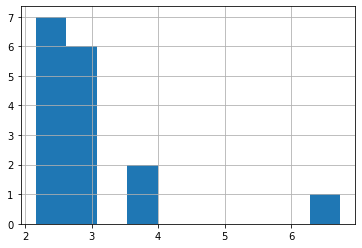

In [49]:
dft16.Bend.hist() # histogram

In [51]:
dft16.sort_values(by = "Inclination", ascending = False) # sort_values = sort # by = "Inclination" (by which column) # ascending = False - same as descending

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
TT,38.90,-12.0,3.16,3.07,1.76,1.43,12.15,9.12,3.98,3.38,5.30,9.03,2.98,2.94,35.0,54.50,18.4,1.09,1.04,-17.3,0.64,-8.0,-21.9,-0.08,0.8,35.6,1.9,0.1,0.39,0.1,0.44,3.3,-5.37,-0.67,-1.66,-0.89,35.1,-0.43,0.05,0.04,...,-0.08,3.27,35.8,-0.4,0.5,-0.03,35.3,0.5,0.3,0.0,-0.1,3.3,35.62,7.2,154.0,-1.27,3.18,-0.8,7.0,31.0,-13.7,7.65,0.94,0.70,-6.6,-18.4,-0.9,-0.93,-6.82,-19.0,-5.4,0.5,36.0,2.3,37.6,13.72,5.35,-7.6,-21.3,-1.00
CA,41.41,-12.3,3.23,3.58,-1.64,1.31,13.58,8.67,3.98,3.79,4.79,9.09,3.70,3.09,60.0,54.71,15.7,1.06,1.16,-8.6,0.80,-8.2,-21.0,0.11,6.4,35.9,0.3,0.4,0.12,0.0,0.21,3.4,-6.57,-1.19,-1.80,-1.37,37.3,-0.97,0.02,0.03,...,0.53,3.33,36.9,0.6,1.1,1.46,39.2,-0.7,0.5,0.1,1.6,3.4,34.50,3.5,-64.0,-1.46,3.09,1.0,9.9,31.0,-14.4,6.38,0.94,0.79,-10.5,-27.8,-1.8,-2.11,-10.44,-26.9,6.8,0.4,34.1,7.4,32.2,1.35,4.61,-8.5,-22.7,-1.45
GG,34.96,-9.5,4.08,2.16,0.71,1.11,15.49,8.45,3.98,3.38,4.62,8.99,3.98,2.80,130.0,85.97,10.2,1.00,1.25,-12.8,1.78,-10.9,-28.4,-0.01,3.3,33.3,1.0,-0.1,0.07,0.0,0.17,3.4,-8.26,-1.55,-2.75,-1.64,32.9,-1.22,0.05,0.04,...,-0.22,3.42,33.4,-1.1,6.5,0.60,33.3,2.7,6.0,0.0,0.8,3.4,33.67,2.1,57.0,-1.78,3.32,0.3,12.1,32.0,-11.1,8.04,1.04,0.98,-12.2,-29.7,-2.9,-3.26,-13.39,-32.7,1.3,-0.6,33.1,1.4,35.5,7.36,5.51,-8.0,-19.9,-1.84
CT,32.15,-11.5,3.63,2.31,0.90,0.92,13.51,8.96,4.70,3.36,5.19,8.98,3.98,2.79,60.0,58.42,14.5,1.04,1.16,-14.3,2.53,-6.6,-16.4,-0.04,5.6,31.9,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.78,-1.17,-1.35,-1.16,31.9,-0.83,0.04,0.04,...,-0.25,3.34,30.5,-2.6,2.9,0.47,31.2,2.8,4.5,-0.4,0.4,3.3,27.70,8.4,-2.0,-1.50,3.30,0.5,8.5,30.0,-14.0,7.08,0.96,0.78,-7.6,-19.2,-1.7,-2.08,-10.48,-27.1,1.0,1.6,34.4,0.5,35.7,7.58,8.98,-7.8,-21.0,-1.28
TC,41.31,-11.4,3.47,2.51,1.35,0.33,13.93,8.76,3.26,3.40,4.71,9.11,2.98,2.95,60.0,86.44,11.3,1.03,1.20,-15.1,0.03,-8.8,-23.5,0.07,2.4,35.9,1.7,0.1,0.36,0.3,0.48,3.4,-9.81,-1.12,-1.41,-1.16,36.3,-0.93,0.04,0.04,...,0.09,3.37,39.3,-0.4,-0.1,-0.07,40.3,0.9,-1.3,0.0,0.0,3.3,36.90,5.3,-120.0,-1.70,3.38,1.3,9.4,32.0,-14.2,8.56,1.04,1.23,-10.2,-26.2,-2.1,-2.35,-12.44,-32.5,2.0,1.7,34.6,5.0,38.4,10.28,5.44,-8.2,-22.2,-1.30
GT,31.12,-11.8,3.41,2.97,2.00,0.11,12.37,9.41,3.98,3.03,6.04,8.79,3.26,4.22,60.0,97.73,10.2,1.02,1.11,-6.7,0.95,-9.4,-25.5,0.23,-0.2,31.1,-0.1,-0.6,0.16,-0.1,0.27,3.4,-10.51,-1.28,-1.13,-1.35,31.5,-0.98,0.05,0.04,...,-0.58,3.36,35.8,-0.9,0.4,-0.13,32.6,0.1,0.5,0.2,-0.2,3.3,34.40,1.1,-143.0,-1.43,3.24,0.8,4.8,32.0,-13.8,8.93,1.07,1.32,-10.2,-26.2,-2.1,-2.24,-11.40,-29.5,-2.5,2.7,33.7,-2.0,35.8,9.57,9.73,-8.4,-22.4,-1.44
AT,33.81,-10.6,3.89,2.60,1.87,0.00,12.87,8.96,4.70,3.02,5.31,8.91,3.26,4.20,20.0,57.02,7.2,1.12,1.02,-16.9,1.68,-5.6,-15.2,-0.06,0.0,29.3,0.0,-0.7,0.09,0.0,0.14,3.3,-6.57,-0.62,-1.19,-0.81,29.3,-0.27,0.05,0.04,...,-0.59,3.31,33.4,0.0,-0.6,-0.37,31.2,0.0,-0.8,0.0,-0.4,3.3,31.50,2.6,0.0,-1.36,3.24,1.1,7

In [53]:
dft16.sort_values(by = ["Bend", "Inclination"], ascending = True) # sort_values = sort # by = ["Bend, "Inclination"] (by which columns)

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
CC,34.96,-9.5,4.08,2.16,0.71,-1.11,15.49,8.45,3.98,3.38,4.62,8.99,3.98,2.80,130.0,85.97,10.2,0.99,1.27,-12.8,1.78,-10.9,-28.4,-0.01,3.3,33.3,1.0,-0.1,0.35,0.0,0.49,3.4,-8.26,-1.55,-2.75,-1.64,32.9,-1.22,0.05,0.04,...,-0.22,3.42,33.4,-1.1,6.5,0.60,33.3,2.7,6.0,0.0,0.8,3.4,33.67,2.1,-57.0,-1.78,3.32,0.3,8.7,32.0,-11.1,8.04,1.04,0.98,-12.2,-29.7,-2.9,-3.26,-13.39,-32.7,1.3,0.6,33.1,1.4,35.5,7.36,5.51,-8.0,-19.9,-1.84
GG,34.96,-9.5,4.08,2.16,0.71,1.11,15.49,8.45,3.98,3.38,4.62,8.99,3.98,2.80,130.0,85.97,10.2,1.00,1.25,-12.8,1.78,-10.9,-28.4,-0.01,3.3,33.3,1.0,-0.1,0.07,0.0,0.17,3.4,-8.26,-1.55,-2.75,-1.64,32.9,-1.22,0.05,0.04,...,-0.22,3.42,33.4,-1.1,6.5,0.60,33.3,2.7,6.0,0.0,0.8,3.4,33.67,2.1,57.0,-1.78,3.32,0.3,12.1,32.0,-11.1,8.04,1.04,0.98,-12.2,-29.7,-2.9,-3.26,-13.39,-32.7,1.3,-0.6,33.1,1.4,35.5,7.36,5.51,-8.0,-19.9,-1.84
AG,32.15,-11.5,3.63,2.31,0.90,-0.92,13.51,8.96,4.70,3.36,5.19,8.98,3.98,2.79,60.0,58.42,14.5,1.06,1.09,-14.3,2.53,-6.6,-16.4,-0.04,5.6,31.9,1.3,-0.3,0.04,-0.2,0.08,3.4,-6.78,-1.17,-1.35,-1.16,31.9,-0.83,0.04,0.04,...,-0.25,3.34,30.5,-2.6,2.9,0.47,31.2,2.8,4.5,-0.4,0.4,3.3,27.70,8.4,2.0,-1.50,3.30,0.5,8.5,30.0,-14.0,7.08,0.96,0.78,-7.6,-19.2,-1.7,-2.08,-10.48,-27.1,1.0,-1.6,34.4,0.5,35.7,7.58,8.98,-7.8,-21.0,-1.28
CT,32.15,-11.5,3.63,2.31,0.90,0.92,13.51,8.96,4.70,3.36,5.19,8.98,3.98,2.79,60.0,58.42,14.5,1.04,1.16,-14.3,2.53,-6.6,-16.4,-0.04,5.6,31.9,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.78,-1.17,-1.35,-1.16,31.9,-0.83,0.04,0.04,...,-0.25,3.34,30.5,-2.6,2.9,0.47,31.2,2.8,4.5,-0.4,0.4,3.3,27.70,8.4,-2.0,-1.50,3.30,0.5,8.5,30.0,-14.0,7.08,0.96,0.78,-7.6,-19.2,-1.7,-2.08,-10.48,-27.1,1.0,1.6,34.4,0.5,35.7,7.58,8.98,-7.8,-21.0,-1.28
GA,41.31,-11.4,3.47,2.51,1.35,-0.33,13.93,8.76,3.26,3.40,4.71,9.11,2.98,2.95,60.0,86.44,11.3,1.08,1.12,-15.1,0.03,-8.8,-23.5,0.07,2.4,35.9,1.7,0.1,0.05,0.3,0.10,3.4,-9.81,-1.12,-1.41,-1.25,36.3,-0.93,0.04,0.04,...,0.09,3.37,39.3,-0.4,-0.1,-0.07,40.3,0.9,-1.3,0.0,0.0,3.3,36.90,5.3,120.0,-1.70,3.38,1.3,9.4,32.0,-14.2,8.56,1.04,1.23,-13.3,-35.5,-2.3,-2.35,-12.44,-32.5,2.0,-1.7,34.6,5.0,38.4,10.28,5.44,-8.2,-22.2,-1.30
TC,41.31,-11.4,3.47,2.51,1.35,0.33,13.93,8.76,3.26,3.40,4.71,9.11,2.98,2.95,60.0,86.44,11.3,1.03,1.20,-15.1,0.03,-8.8,-23.5,0.07,2.4,35.9,1.7,0.1,0.36,0.3,0.48,3.4,-9.81,-1.12,-1.41,-1.16,36.3,-0.93,0.04,0.04,...,0.09,3.37,39.3,-0.4,-0.1,-0.07,40.3,0.9,-1.3,0.0,0.0,3.3,36.90,5.3,-120.0,-1.70,3.38,1.3,9.4,32.0,-14.2,8.56,1.04,1.23,-10.2,-26.2,-2.1,-2.35,-12.44,-32.5,2.0,1.7,34.6,5.0,38.4,10.28,5.44,-8.2,-22.2,-1.30
AT,33.81,-10.6,3.89,2.60,1.87,0.00,12.87,8.96,4.70,3.02,5.31,8.91,3.26,4.20,20.0,57.02,7.2,1.12,1.02,-16.9,1.68,-5.6,-15.2,-0.06,0.0,29.3,0.0,-0.7,0.09,0.0,0.14,3.3,-6.57,-0.62,-1.19,-0.81,29.3,-0.27,0.05,0.04,...,-0.59,3.31,33.4,0.0,-0.6,-0.37,31.2,0.0,-0.8,0.0,-0.4,3.3,31.50,2.6,0.0,-1.36,3.24,1.1,7

In [56]:
dftF = dft16[dft16["Bend"] < 2.5] # filter such rows where "Bend" < 2.5

In [59]:
dftF # F means filtered

,Twist,Stacking energy,Rise,Bend,Tip,Inclination,Major Groove Width,Major Groove Depth,Major Groove Size,Major Groove Distance,Minor Groove Width,Minor Groove Depth,Minor Groove Size,Minor Groove Distance,Persistance Length,Melting Temperature,Probability contacting nucleosome core,Mobility to bend towards major groove,Mobility to bend towards minor groove,Propeller Twist,Clash Strength,Enthalpy,Entropy,Shift (RNA),Roll (DNA-protein complex),Twist (DNA-protein complex),Tilt (DNA-protein complex),Slide (DNA-protein complex),Hydrophilicity (RNA),Shift (DNA-protein complex),Hydrophilicity (RNA),Rise (DNA-protein complex),Stacking energy,Free energy,Free energy,Free energy,Twist (DNA-protein complex),Free energy,Twist_twist,Tilt_tilt,...,Slide (DNA-protein complex),Rise (DNA-protein complex),Twist,Tilt,Roll,Slide,Twist,Tilt,Roll,Shift,Slide,Rise,Twist,Wedge,Direction,Slide (RNA),Rise (RNA),Tilt (RNA),Roll (RNA),Twist (RNA),Stacking energy (RNA),Rise stiffness,Melting Temperature,Stacking energy,Enthalpy (RNA),Entropy (RNA),Free energy (RNA),Free energy (RNA),Enthalpy (RNA),Entropy (RNA),Roll,Tilt,Twist,Roll,Twist,Flexibility_slide,Flexibility_shift,Enthalpy,Entropy,Free energy
AG,32.15,-11.5,3.63,2.31,0.90,-0.92,13.51,8.96,4.70,3.36,5.19,8.98,3.98,2.79,60.0,58.42,14.5,1.06,1.09,-14.3,2.53,-6.6,-16.4,-0.04,5.6,31.9,1.3,-0.3,0.04,-0.2,0.08,3.4,-6.78,-1.17,-1.35,-1.16,31.9,-0.83,0.04,0.04,...,-0.25,3.34,30.5,-2.6,2.9,0.47,31.2,2.8,4.5,-0.4,0.4,3.3,27.70,8.4,2.0,-1.50,3.30,0.5,8.5,30.0,-14.0,7.08,0.96,0.78,-7.6,-19.2,-1.7,-2.08,-10.48,-27.1,1.0,-1.6,34.4,0.5,35.7,7.58,8.98,-7.8,-21.0,-1.28
CC,34.96,-9.5,4.08,2.16,0.71,-1.11,15.49,8.45,3.98,3.38,4.62,8.99,3.98,2.80,130.0,85.97,10.2,0.99,1.27,-12.8,1.78,-10.9,-28.4,-0.01,3.3,33.3,1.0,-0.1,0.35,0.0,0.49,3.4,-8.26,-1.55,-2.75,-1.64,32.9,-1.22,0.05,0.04,...,-0.22,3.42,33.4,-1.1,6.5,0.60,33.3,2.7,6.0,0.0,0.8,3.4,33.67,2.1,-57.0,-1.78,3.32,0.3,8.7,32.0,-11.1,8.04,1.04,0.98,-12.2,-29.7,-2.9,-3.26,-13.39,-32.7,1.3,0.6,33.1,1.4,35.5,7.36,5.51,-8.0,-19.9,-1.84
CT,32.15,-11.5,3.63,2.31,0.90,0.92,13.51,8.96,4.70,3.36,5.19,8.98,3.98,2.79,60.0,58.42,14.5,1.04,1.16,-14.3,2.53,-6.6,-16.4,-0.04,5.6,31.9,1.3,-0.3,0.38,-0.2,0.52,3.4,-6.78,-1.17,-1.35,-1.16,31.9,-0.83,0.04,0.04,...,-0.25,3.34,30.5,-2.6,2.9,0.47,31.2,2.8,4.5,-0.4,0.4,3.3,27.70,8.4,-2.0,-1.50,3.30,0.5,8.5,30.0,-14.0,7.08,0.96,0.78,-7.6,-19.2,-1.7,-2.08,-10.48,-27.1,1.0,1.6,34.4,0.5,35.7,7.58,8.98,-7.8,-21.0,-1.28
GG,34.96,-9.5,4.08,2.16,0.71,1.11,15.49,8.45,3.98,3.38,4.62,8.99,3.98,2.80,130.0,85.97,10.2,1.00,1.25,-12.8,1.78,-10.9,-28.4,-0.01,3.3,33.3,1.0,-0.1,0.07,0.0,0.17,3.4,-8.26,-1.55,-2.75,-1.64,32.9,-1.22,0.05,0.04,...,-0.22,3.42,33.4,-1.1,6.5,0.60,33.3,2.7,6.0,0.0,0.8,3.4,33.67,2.1,57.0,-1.78,3.32,0.3,12.1,32.0,-11.1,8.04,1.04,0.98,-12.2,-29.7,-2.9,-3.26,-13.39,-32.7,1.3,-0.6,33.1,1.4,35.5,7.36,5.51,-8.0,-19.9,-1.84
